## Complaint Database Project
*Data from https://catalog.data.gov/dataset/consumer-complaint-database.*


The CFPB, or Consumer Financial Protection Bureau, was created in 2010 with the Dodd-Wall Street Reform and Protection Consumer Act. The act and bureau were made in response to the 2008 economic crisis. Throughout its lifespan, the Consumer Financial Protection Bureau has been fairly controversial.


This specific dataset is a list of complains that the CFBP has recieved about financial products and services.


Through exploring this dataset, I hoped to find trends in data and see what conclusions I could make. This is the first major independent data analysis that I had done. As such, there is a lot I would wish I had done differently. However, I did manage to successfully find several points of interest. This dataset is one that I would like to revisit and perform a more thorough statistical analysis using seaborn and numpy on a later date.

In [1]:
import numpy as np
import shapefile
import pandas as pd
#Imports matplotlib
from matplotlib import cm
from matplotlib.collections import PatchCollection
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import matplotlib as mpl
#classic style
plt.style.use('fivethirtyeight')
%matplotlib inline
import shapefile
sf = shapefile.Reader("Shapefile/USA/cb_2017_us_state_500k.sh")
import pandas as pd
df = pd.read_csv('complaints.csv')

In [2]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [3]:
issues = df[['Date received','Product','Sub-product']].copy()
issues.head()

,Date received,Product,Sub-product
0,03/12/2014,Mortgage,Other mortgage
1,01/19/2017,Student loan,Federal student loan servicing
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card
3,06/08/2014,Credit card,NaN
4,09/13/2014,Debt collection,Credit card


In [4]:
#products
def products(ans):
    if 'credit' in ans.lower():
        return "Credit"
    elif 'loan' in ans.lower():
        return "Loan"
    elif 'account' in ans.lower():
        return "Account"
    elif 'money' in ans.lower() or 'currency' in ans.lower():
        return "Money"
    elif 'other financial service' in ans.lower() or 'prepaid' in ans.lower():
        return 'Other Service'
    return ans
issues['Product'] = issues['Product'].apply(products)

In [5]:
#subproducts
def subproducts(ans):
    if 'loan' in str(ans).lower() or 'auto' in str(ans).lower():
        return "Loan"
    elif 'lease' in str(ans).lower():
        return "Lease"
    elif 'credit' in str(ans).lower() and 'card' not in str(ans).lower():
        return "Credit"
    elif 'card' in str(ans).lower():
        return "Card"
    elif 'debt' in str(ans).lower():
        return "Debt"
    elif 'mortgage' in str(ans).lower():
        return "Mortgage"
    elif 'check' in str(ans).lower():
        return "Check"
    elif 'service' in str(ans).lower() or 'product' in str(ans).lower() or 'health club' in str(ans).lower() or 'wallet' in str(ans).lower() or 'personal' in str(ans).lower():
        return "Product/Service"
    elif 'money' in str(ans).lower() or 'currency' in str(ans).lower():
        return "Currency"
    elif 'CD' in str(ans):
        return "Certificate of Deposit"
    elif 'i do not know' in str(ans).lower():
        return "Invalid Reason"
    return ans
issues['Sub-product'] = issues['Sub-product'].apply(subproducts)

In [6]:
#combine
table = pd.crosstab(issues['Sub-product'].fillna('NaN'),issues['Product'])
table.info()
table.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Card to Savings account
Data columns (total 7 columns):
Account            14 non-null int64
Credit             14 non-null int64
Debt collection    14 non-null int64
Loan               14 non-null int64
Money              14 non-null int64
Mortgage           14 non-null int64
Other Service      14 non-null int64
dtypes: int64(7)
memory usage: 896.0+ bytes


Product,Account,Credit,Debt collection,Loan,Money,Mortgage,Other Service
Sub-product,,,,,,,
Card,0,32367,42508,0,0,0,3401
Certificate of Deposit,4208,0,0,0,0,0,0
Check,79879,0,0,0,320,0,422
Credit,17,149310,0,2995,0,0,103
Currency,0,0,0,0,10911,0,202
Debt,0,0,35514,0,174,0,333
Invalid Reason,0,0,43923,0,0,0,0
Lease,0,0,0,3953,0,0,0
Loan,0,0,23574,84828,0,14174,0


Text(0.5,1,'Types of Complaints to Consumer Financial Protection Bureau (2012-2018)\n')

<Figure size 432x288 with 0 Axes>

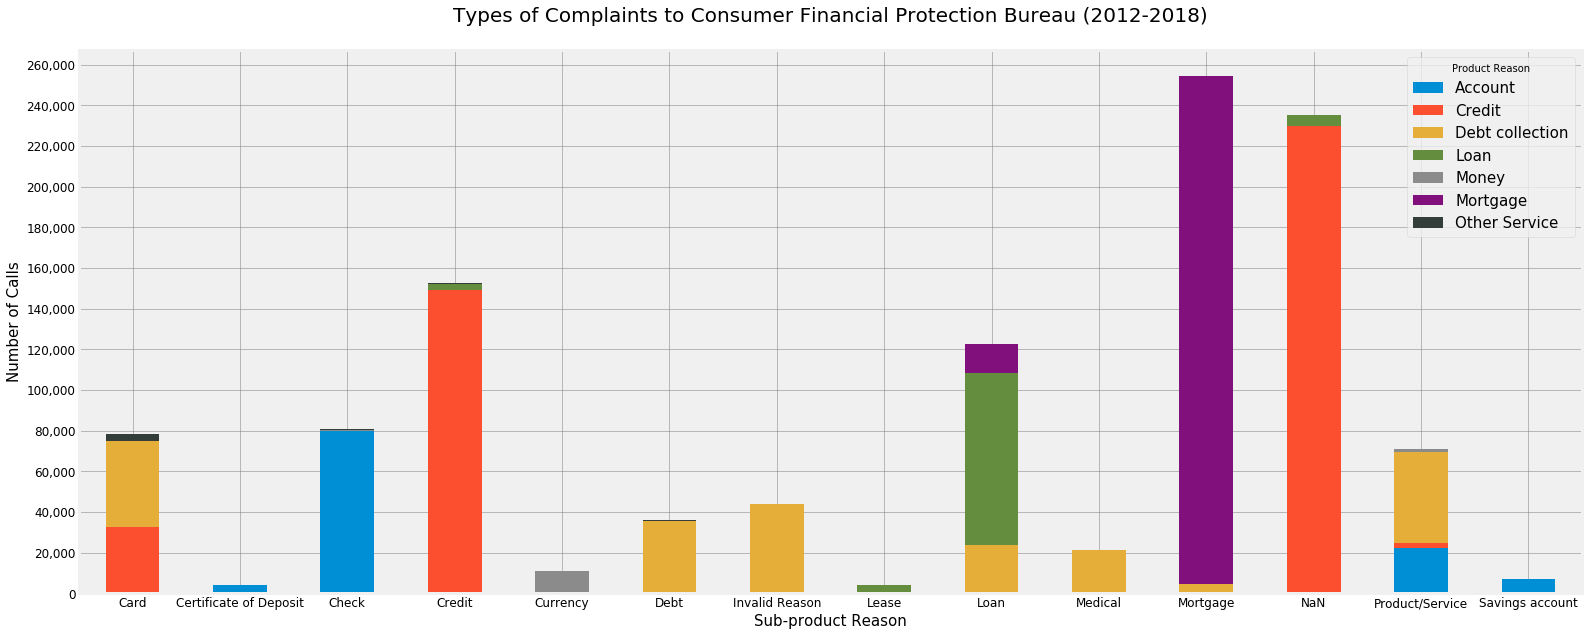

In [7]:
colors = ['#008FD5', '#FC4F30','#E5AE38','#648E3E','#8B8B8B','#810F7C','#333d3a']
fig = plt.figure()
ax = table.plot(kind='bar', stacked=True,figsize=(24,10),legend=True,rot=0,fontsize=12,color=colors)
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.yticks(np.arange(0, 280000, step=20000))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Sub-product Reason',fontsize=15)
plt.ylabel('Number of Calls',fontsize=15)
plt.legend(title='Product Reason',loc=1, prop={'size': 15})
plt.title('Types of Complaints to Consumer Financial Protection Bureau (2012-2018)\n',fontsize=20)

In [8]:
from datetime import datetime as dt
timeline = df['Date received'].value_counts(ascending=False)
time = timeline.to_frame()
time = time.set_index(pd.DatetimeIndex(time.index))
time = time.set_index(time.index.map(lambda x: str(x.year) + "-" + str(x.month)))
time = time.set_index(pd.DatetimeIndex(time.index))
time = time.groupby(time.index)['Date received'].sum()

Text(0,0,'Equifax\nData Breach')

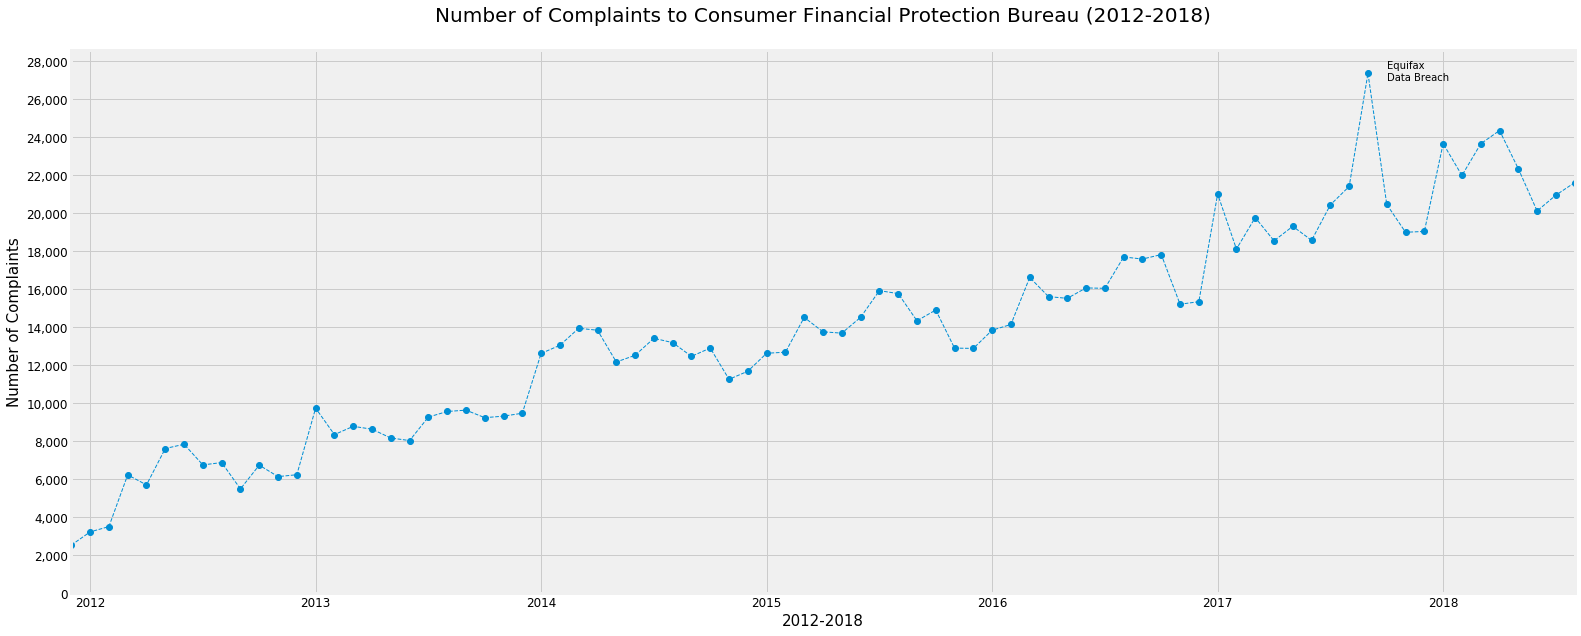

In [9]:
fig = plt.figure()
ax = time.plot(figsize=(24,10),linewidth=1,linestyle='--',marker='o',fontsize=12)
plt.yticks(np.arange(0, 30000, step=2000))
plt.xlim(pd.Timestamp('2011-12-01'), pd.Timestamp('2018-08-01'))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('2012-2018',fontsize=15)
plt.ylabel('Number of Complaints',fontsize=15)
plt.title('Number of Complaints to Consumer Financial Protection Bureau (2012-2018)\n',fontsize=20)
import matplotlib.dates as mdates
ax.annotate('Equifax\nData Breach', xy=('2017-10-1', 27000), xytext=(0,0), textcoords='offset points')
#https://www.vox.com/policy-and-politics/2018/4/30/17277172/equifax-data-breach-cfpb-elizabeth-warren-mick-mulvaney

## Equifax Data Breach
https://www.vox.com/policy-and-politics/2018/4/30/17277172/equifax-data-breach-cfpb-elizabeth-warren-mick-mulvaney


Lead to a massive spike in complains to the CFPB

In [10]:
df['State'].count()

1107951

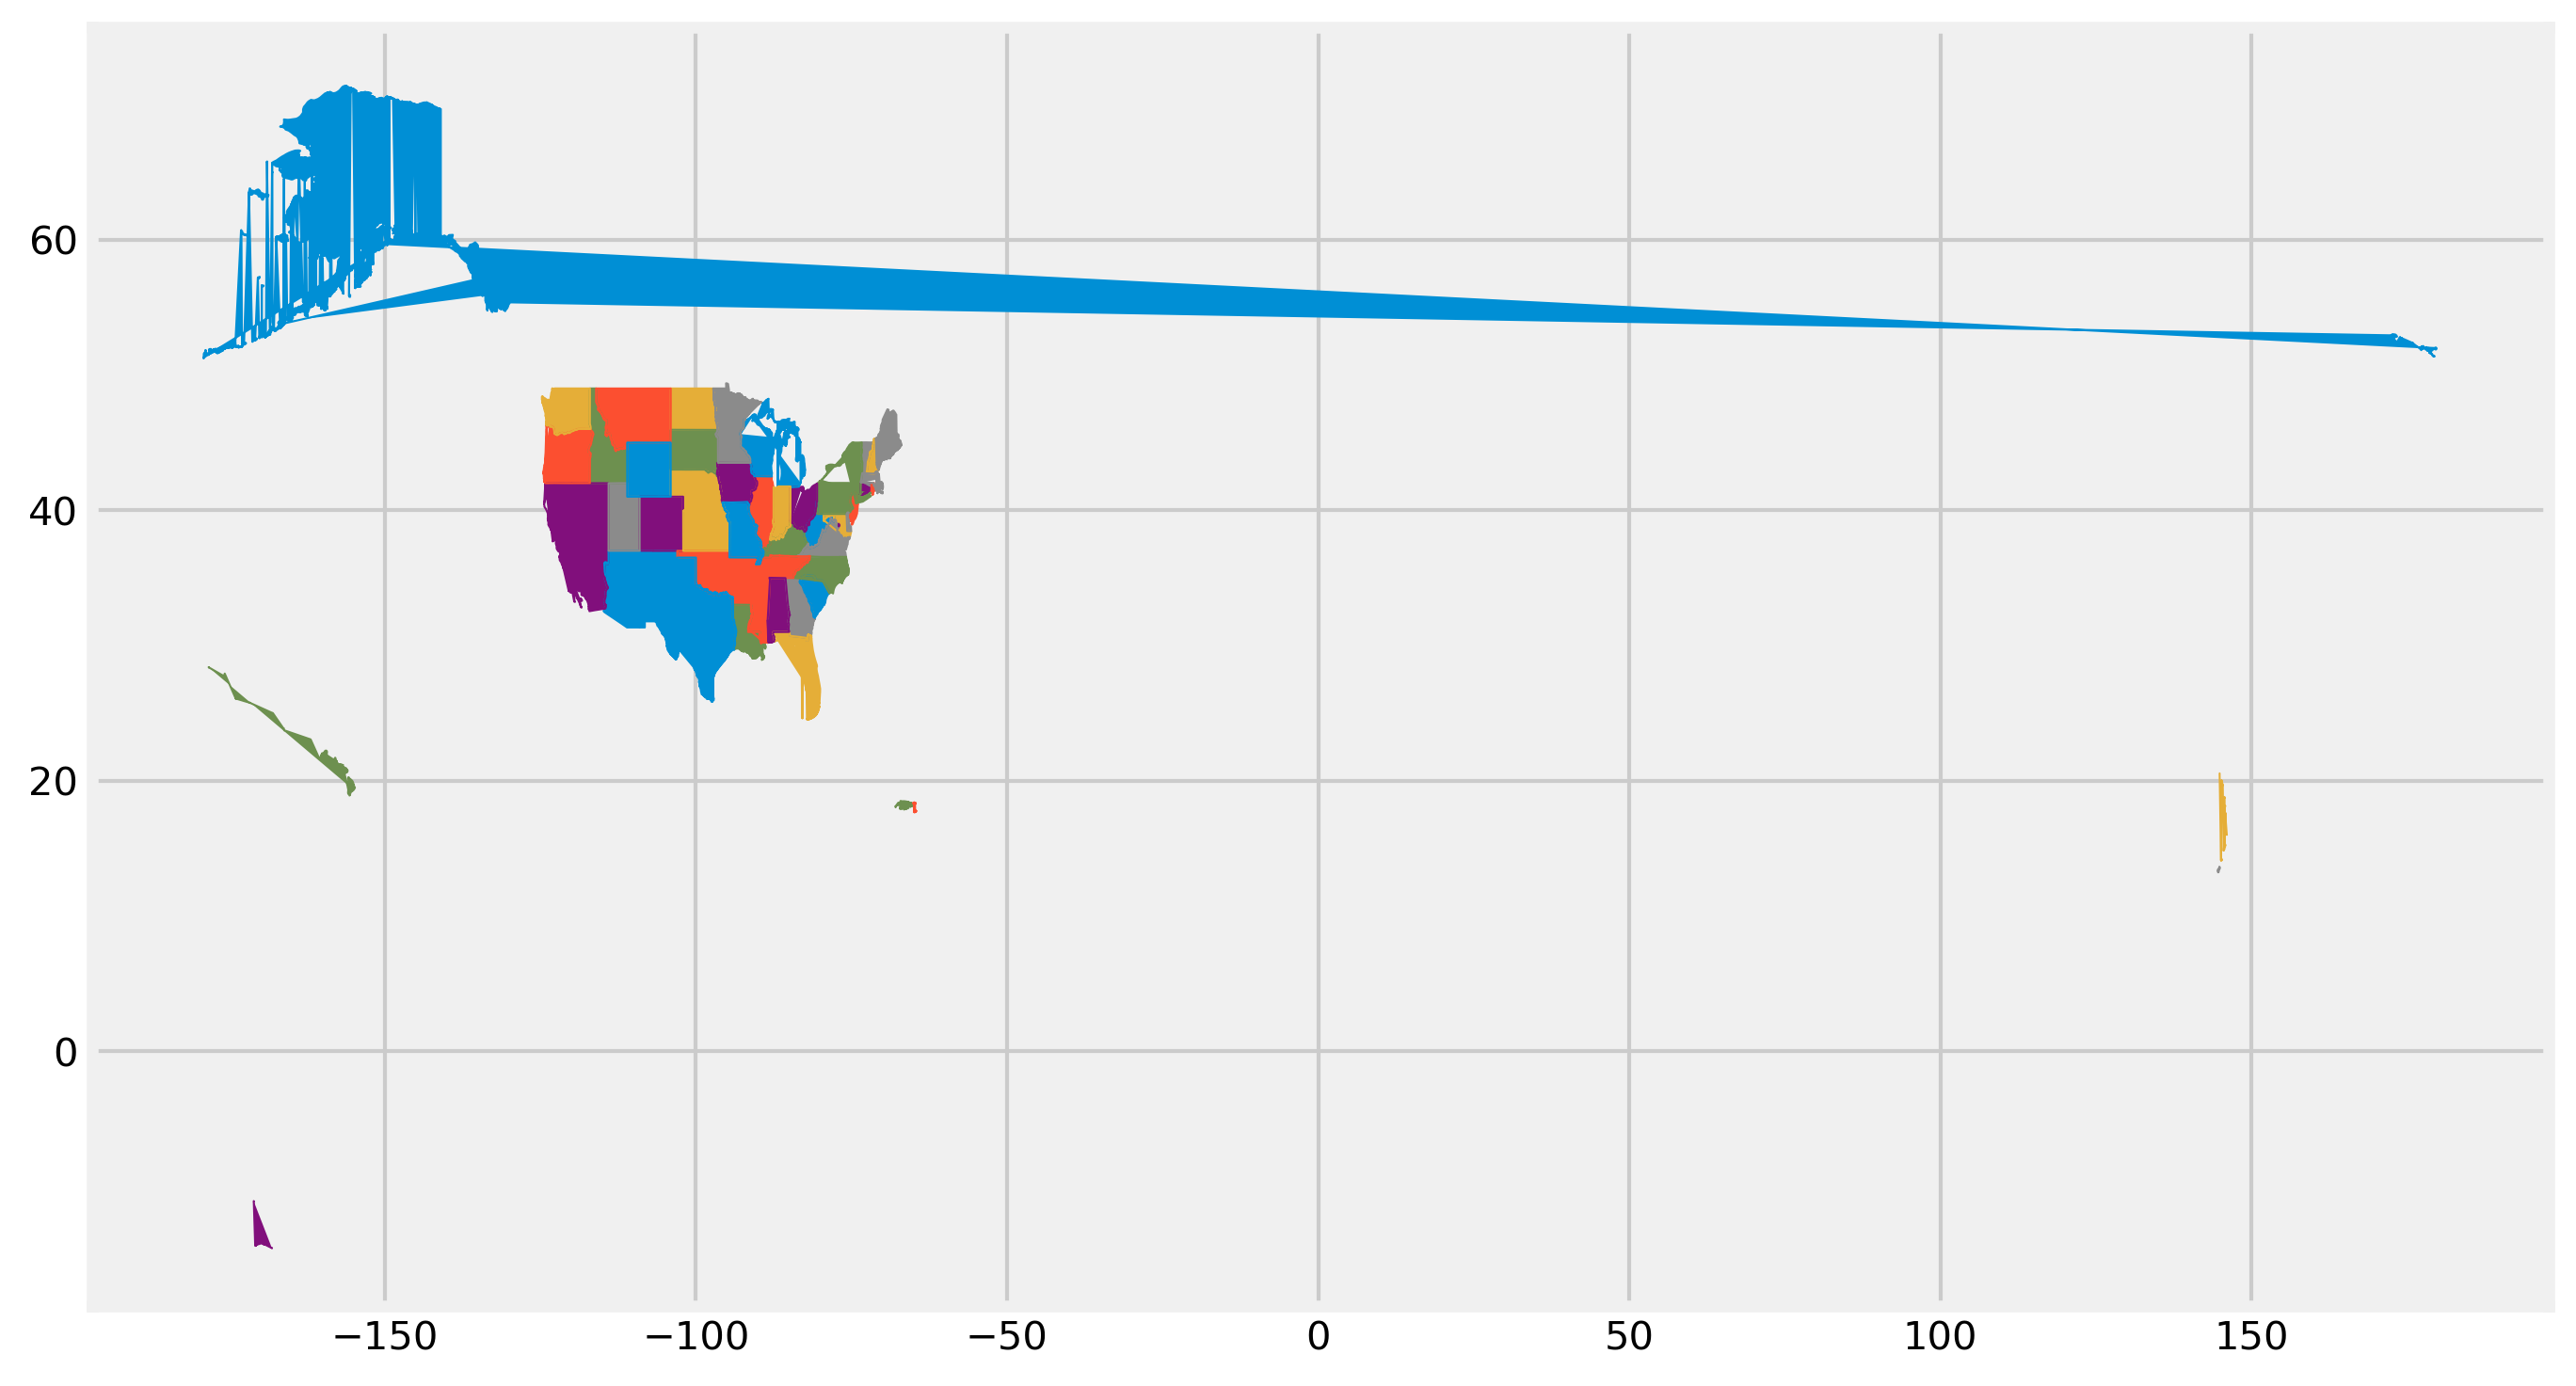

In [11]:
fig = plt.figure(figsize=(10,6),dpi=300)
fields = [x[0] for x in sf.fields][1:]
records = sf.records()
shps = [s.points for s in sf.shapes()]
dh = pd.DataFrame(columns=fields, data=records)
dh = dh.assign(coords=shps)
for state in dh.coords:
    x_lon = []
    y_lat = []
    for coordlist in state:
        for i in range(0,len(coordlist)):
            if(i % 2 == 0):
                x_lon.append(coordlist[i])
            else:
                y_lat.append(coordlist[i])
    plt.plot(x_lon,y_lat,linewidth=.5)
    plt.fill(x_lon,y_lat,zorder=1)
plt.show()
#Why not to fill using pandas

In [ ]:
recs = sf.records()
states = sf.shapes()
states_info = []
calls = df.groupby('State')['State'].count()
arr=[]
for nState in range(len(states)):
    states_info.append(recs[nState][1])
    arr.append(calls[calls.index == sf.records()[nState][4]][0])
norm = plt.Normalize()
arrnorm = norm(arr)
colors = plt.cm.viridis(arrnorm)

#Plot United States
fig = plt.figure()
fig = plt.figure(figsize=(9,6),dpi=300)
gridspec.GridSpec(12,12)
#plots
ax1 = plt.subplot2grid((12,12), (0,0), colspan=11, rowspan=12)
for nState in range(len(states)):
    ptchs = []
    pts = np.asarray(states[nState].points)
    parts = states[nState].parts
    par = list(parts) + [pts.shape[0]]
    for val in range(len(parts)):
        ptchs.append(Polygon(pts[par[val]:par[val+1]]))
    ax1.add_collection(PatchCollection(ptchs,facecolor=colors[nState],edgecolor='k', linewidth=.3))
ax1.set_xlim(-180,-62)
ax1.set_ylim(15,72)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
#Add Colorbar
ax2 = plt.subplot2grid((12,12), (0,11), colspan = 1, rowspan=12)
norm = mpl.colors.Normalize(vmin=min(arr), vmax=max(arr))
comma = FuncFormatter(lambda x, p: format(int(x), ','))
colorbar = mpl.colorbar.ColorbarBase(ax2, cmap=mpl.cm.viridis,norm=norm,orientation='vertical',format = comma)
colorbar.set_label('Number of Calls')
plt.suptitle("Number of Calls to Consumer Financial Protection Bureau (2012-2018)",fontsize=15)

Text(0.5,0.98,'Number of Calls to Consumer Financial Protection Bureau (2012-2018)')

<Figure size 432x288 with 0 Axes>

In [ ]:
print(calls.sort_values(ascending=False))

## Choropleth Map
Certain states require more assistance than others.
1. California (156057)
2. Florida (107926)
3. Texas (92673)
4. New York (75494)
5. Georgia (57577)